In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
import scipy.stats as stats
import math
from scipy.stats import norm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text yticklabel objects>)

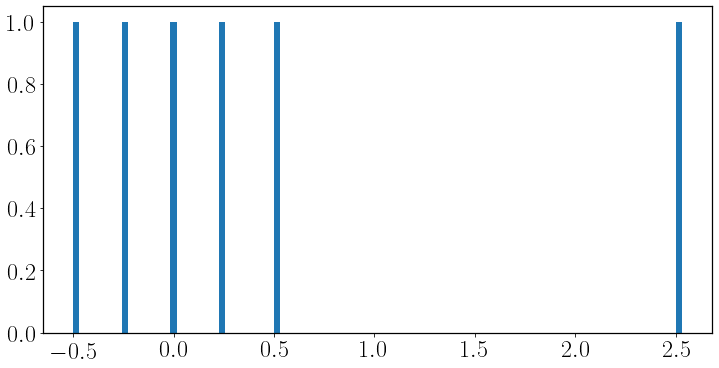

In [28]:
R = np.array([-0.5, -0.25, 0, 0.25, 0.5, 2.53])  # rewards

# figure properties
fig,ax = plt.subplots(figsize=(12, 6))
plt.rcParams['text.usetex'] = True
hist = plt.hist(R, bins=100)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)




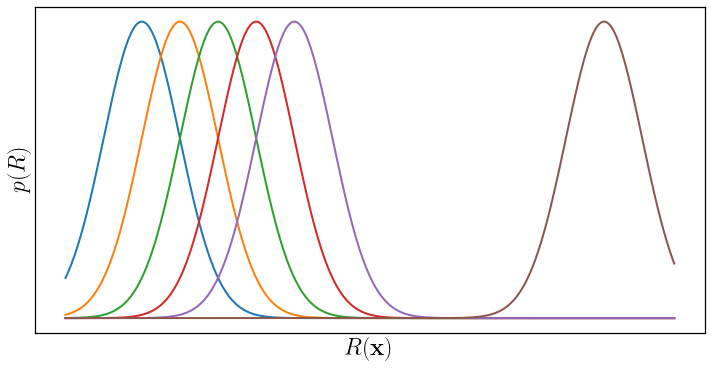

In [29]:
x_d = np.arange(-1.0, 3, 0.01)

# figure properties
fig,ax = plt.subplots(figsize=(12, 6))
plt.rcParams['text.usetex'] = True


for l in range(len(R)):
    y_n = stats.norm.pdf(x_d, R[l], 0.25)
    plt.plot(y_n, lw=2.0)
    
    
# additional properties
plt.xlabel(r'$R(\mathbf{x})$', fontsize=24)
plt.ylabel(r'$p(R)$', fontsize=24)
plt.rcParams['axes.linewidth'] = 1.25 
plt.yticks([], fontsize=24)
plt.xticks([], fontsize=18)


plt.show()
fig.savefig("kernel_density_example.pdf", bbox_inches='tight')


In [30]:
np.where(x_d==R[0])

(array([], dtype=int64),)

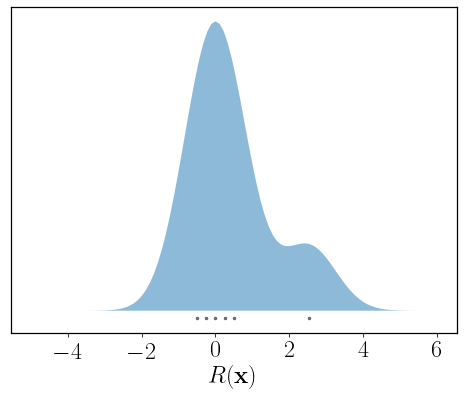

In [31]:
x_d = np.linspace(-5, 6, 100)
# instantiate and fit the KDE model
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x_d[:, None]);
b = grid.best_params_['bandwidth']


kde = KernelDensity(bandwidth=b, kernel='gaussian')
kde.fit(R[:, None])
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])


# figure properties
fig,ax = plt.subplots(figsize=(8, 6))
plt.rcParams['text.usetex'] = True

# main plot
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(R, np.full_like(R, -0.01), 'ok', markersize=2.5, alpha=0.5)

# additional properties
plt.xlabel(r'$R(\mathbf{x})$', fontsize=24)
plt.rcParams['axes.linewidth'] = 1.25 
plt.xticks(fontsize=24)
plt.yticks([], fontsize=18)


# plot one gaussian
# mean,std=norm.fit(R)
# y = norm.pdf(x_d, mean, std)
# plt.fill_between(x_d, y, alpha=0.5)


plt.show()
fig.savefig("reward_density_estimate_gaussian.pdf", bbox_inches='tight')


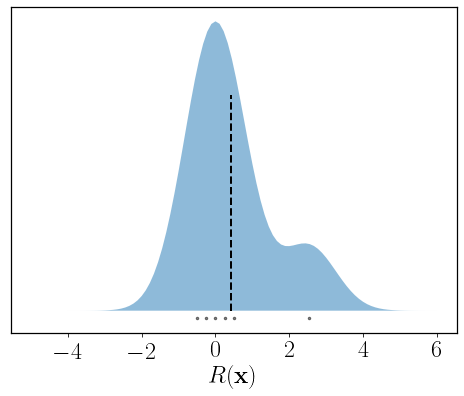

In [32]:
y = np.exp(logprob)
y = y / sum(y)
prod = y*x_d
mean = sum(prod)

# plot new mean
# figure properties
fig,ax = plt.subplots(figsize=(8, 6))
plt.rcParams['text.usetex'] = True
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(R, np.full_like(R, -0.01), 'ok', markersize=2.5, alpha=0.5)
plt.vlines(mean, 0, 0.30, linestyle='--', lw=2.0)
# additional properties
plt.xlabel(r'$R(\mathbf{x})$', fontsize=24)
plt.rcParams['axes.linewidth'] = 1.25 
plt.xticks(fontsize=24)
plt.yticks([], fontsize=18)
plt.show()
fig.savefig("reward_density_estimate_gaussian.pdf", bbox_inches='tight')

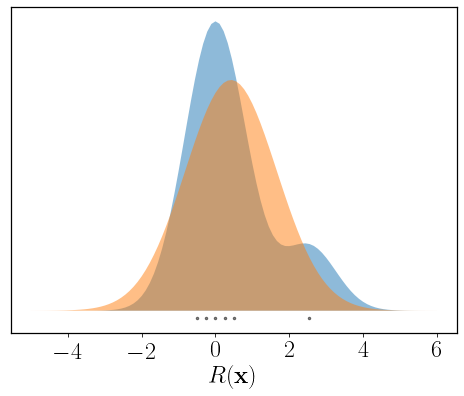

In [33]:
# calculate variance
# var = E[X^2] - (E[X])^2
var = sum(x_d**2*y) - mean**2
sigma = np.sqrt(var)
y_n = stats.norm.pdf(x_d, mean, sigma)
# y_n = y_n / sum(y_n)

# plot new mean
# figure properties
fig,ax = plt.subplots(figsize=(8, 6))
plt.rcParams['text.usetex'] = True
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(R, np.full_like(R, -0.01), 'ok', markersize=2.5, alpha=0.5)
# plt.vlines(mean, 0, 0.30, linestyle='--', lw=2.0)
plt.fill_between(x_d, y_n, alpha=0.5)

# additional properties
plt.xlabel(r'$R(\mathbf{x})$', fontsize=24)
plt.rcParams['axes.linewidth'] = 1.25 
plt.xticks(fontsize=24)
plt.yticks([], fontsize=18)
plt.show()
